### 목표 설정
- kiwipiepy 형태소 분석기를 사용해보고 konlpy와는 어떤점이 다른지 확인

#### Kiwi 라이브러리

- 빠른 속도와 범용적인 성능을 지향하는 형태소 분석기
- C++로 구현된 코어를 래핑해서 프로그래밍 언어에서 사용하도록 만들었다./ 오픈 소스 공개
- 세종 품사 태그셋을 사용한다.
- 웹 텍스트 87% / 문어체 텍스트는 94% 정확도로 형태소 분석이 가능하다.
- konlpy보다 속도가 빠르다. 간단한 오타나 띄어쓰기 스스로 교정할 수 있는 기능을 제공하고 있다.

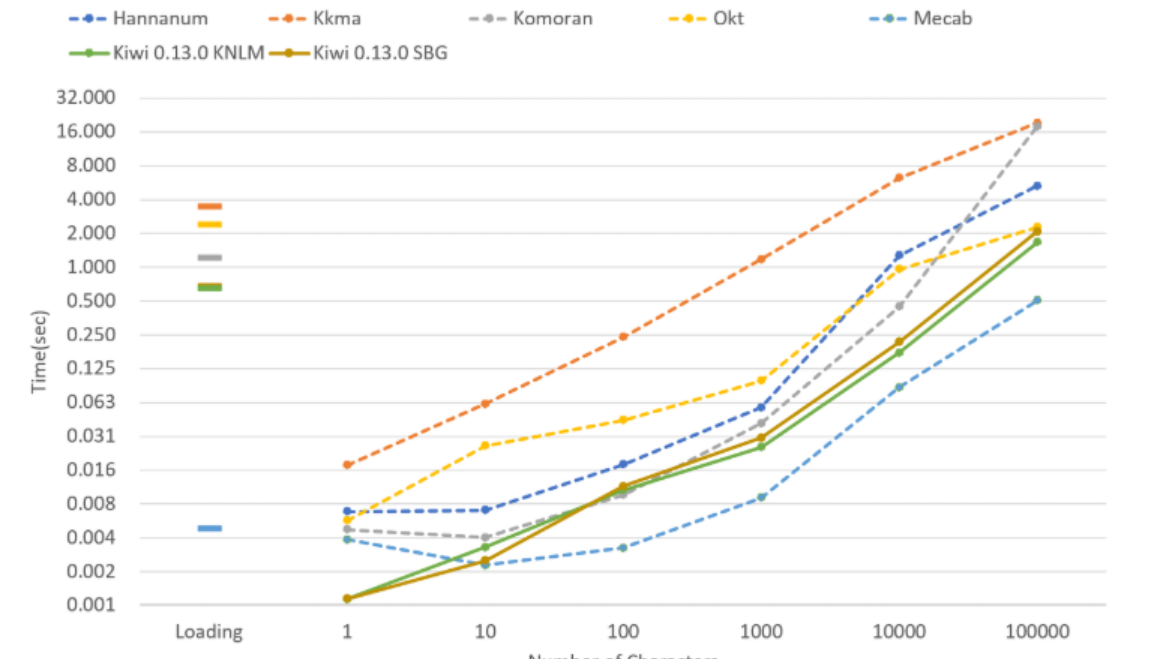

In [49]:
# 나눔 고딕 설치
!sudo apt-get install -y fonts-nanum # 폰트
!sudo fc-cache -fv # 캐시 갱신
!rm ~/.cache/matplotlib -rf # 폰트 캐시 삭제

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [50]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글지원 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스기호 지원

In [51]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd

In [53]:
!pwd

/content/drive/My Drive/Colab Notebooks/est


In [54]:
# 소스코드가 있는 경로로 위치를 변경
%cd /content/drive/MyDrive/Colab Notebooks/est

/content/drive/MyDrive/Colab Notebooks/est


In [55]:
!pwd

/content/drive/MyDrive/Colab Notebooks/est


In [56]:
# train데이터 / test 데이터 불러오기
train = pd.read_csv('./data/ratings_train.csv', encoding='utf-8')
test = pd.read_csv('./data/ratings_test.csv', encoding='utf-8')
test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [57]:
# 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [59]:
# 결측치 처리
train = train.dropna()
test = test.dropna()

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [61]:
# 데이터 분할 - 어떤 컬럼이 문제데이터, 어떤 컬럼이 정답데이터

X_train = train['document']
y_train = train['label']
X_test = test['document']
y_test = test['label']

In [62]:
# 데이터 분할
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((149995,), (149995,), (49997,), (49997,))

### Kiwipiepy 라이브러리 설치하기
- kiwipiepy 라이브러리는 의존성이 없다. 편리하게 환경구축 가능하다.

In [63]:
!pip install kiwipiepy

In [64]:
# 라이브러리 import
from sklearn.feature_extraction.text import TfidfVectorizer

# 키위파이 형태소 분석기 불러오기
from kiwipiepy import Kiwi, basic_typos_with_continual

In [65]:
# 객체 생성
kiwi = Kiwi(typos=basic_typos_with_continual)

### 오타 교정 도구
- kiwipiepy는 간단한 오타 교정도구를 제공
  - basic_typos : 형태소 내의 오타를 교정하는 기본적인 오타 교정 도구
  - continual_typos : 형태소간의 오타를 교정하는 교정 도구
  - basic_typos_with_continual : 위의 두가지 오타 교정도구를 하나로 합쳤다.

In [66]:
# 형태소 분석
token = kiwi.tokenize("아버지 가방에 들어가신다")
# form : 실제 형태소
# tag : 품사 태그
# start : 형태소의 시작 인덱스
token

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가', tag='JKS', start=4, len=1),
 Token(form='방', tag='NNG', start=5, len=1),
 Token(form='에', tag='JKB', start=6, len=1),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1),
 Token(form='ᆫ다', tag='EF', start=11, len=2)]

In [67]:
# 형태소 분석된 곳에서 태그만 가져오자
# .tag

token[0].tag

'NNG'

In [68]:
token[0].form

'아버지'

In [69]:
# 더미 문장 데이터를 이용해서 kiwi 라이브러리 사용법 익혀보기
text = '오늘은 목요일입니당. 금요일이 오기는 올까욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'
# 형태소 분석 시작
token = kiwi.tokenize(text)

token

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='목요일', tag='NNG', start=4, len=3),
 Token(form='이', tag='VCP', start=7, len=1),
 Token(form='ᆸ니다', tag='EF', start=7, len=3),
 Token(form='ᆼ', tag='Z_CODA', start=9, len=1),
 Token(form='.', tag='SF', start=10, len=1),
 Token(form='금요일', tag='NNG', start=12, len=3),
 Token(form='이', tag='JKS', start=15, len=1),
 Token(form='오', tag='VV', start=17, len=1),
 Token(form='기', tag='ETN', start=18, len=1),
 Token(form='는', tag='JX', start=19, len=1),
 Token(form='오', tag='VX', start=21, len=1),
 Token(form='ᆯ까요', tag='EF', start=21, len=3),
 Token(form='ᆿ', tag='Z_CODA', start=23, len=1),
 Token(form='ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', tag='SW', start=24, len=11)]

In [70]:
# 결합된 초성체가 분리가 되지 않는 모습
# 필요에 따라 오타 교정도구를 수정할 필요가 있어보임

from kiwipiepy import basic_typos

In [71]:
kiwi2 = Kiwi(typos=basic_typos)

In [72]:
# 욬 에 있는, 'ㅋ' 제외해보기

# 더미 문장 데이터
text = '오늘은 목요일입니닼ㅋㅋ. 금요일이 오기는 올까욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'

# normalize_coda
# 초성체가 어절 뒤에 붙는 경우 분리해주는 기능 (기본값 False)
token = kiwi2.tokenize(text, normalize_coda= True) # '욬'의 'ㅋ'제외
token

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='목요일', tag='NNG', start=4, len=3),
 Token(form='이', tag='VCP', start=7, len=1),
 Token(form='ᆸ니다', tag='EF', start=7, len=3),
 Token(form='ㅋㅋㅋ', tag='SW', start=9, len=3),
 Token(form='.', tag='SF', start=12, len=1),
 Token(form='금요일', tag='NNG', start=14, len=3),
 Token(form='이', tag='JKS', start=17, len=1),
 Token(form='오', tag='VV', start=19, len=1),
 Token(form='기', tag='ETN', start=20, len=1),
 Token(form='는', tag='JX', start=21, len=1),
 Token(form='오', tag='VX', start=23, len=1),
 Token(form='ᆯ까요', tag='EF', start=23, len=3),
 Token(form='ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', tag='SW', start=25, len=12)]

In [73]:
# split_complex
# 합성어를 분리하는 기능 - (기본값 : False)

# 형태소 : 의미를 가진 가장 작은 언어의 단위
kiwi2.tokenize('얼마전 콩국수집에 방문했더니, 설탕통이 번쩍거리며 눈에 들어왔다', split_complex=True)


[Token(form='얼마', tag='NNG', start=0, len=2),
 Token(form='전', tag='NNG', start=2, len=1),
 Token(form='콩국수', tag='NNG', start=4, len=3),
 Token(form='집', tag='NNG', start=7, len=1),
 Token(form='에', tag='JKB', start=8, len=1),
 Token(form='방문', tag='NNG', start=10, len=2),
 Token(form='하', tag='XSV', start=12, len=1),
 Token(form='었', tag='EP', start=12, len=1),
 Token(form='더니', tag='EC', start=13, len=2),
 Token(form=',', tag='SP', start=15, len=1),
 Token(form='설탕', tag='NNG', start=17, len=2),
 Token(form='통', tag='NNG', start=19, len=1),
 Token(form='이', tag='JKS', start=20, len=1),
 Token(form='번쩍', tag='MAG', start=22, len=2),
 Token(form='거리', tag='XSV', start=24, len=2),
 Token(form='며', tag='EC', start=26, len=1),
 Token(form='눈', tag='NNG', start=28, len=1),
 Token(form='에', tag='JKB', start=29, len=1),
 Token(form='들', tag='VV', start=31, len=1),
 Token(form='어', tag='EC', start=32, len=1),
 Token(form='오', tag='VX', start=33, len=1),
 Token(form='었', tag='EP', start=33, l

In [74]:
# 기본적인 오타 교정

In [75]:
kiwi2.tokenize('외않됀대?')

[Token(form='왜', tag='MAG', start=0, len=1),
 Token(form='안', tag='MAG', start=1, len=1),
 Token(form='되', tag='VV', start=2, len=1),
 Token(form='ᆫ대', tag='EF', start=2, len=2),
 Token(form='?', tag='SF', start=4, len=1)]

In [76]:
kiwi.tokenize('오늘 사무시레서 이를 하는데 아까 지가칸 사라미 이써서 웨 지가캤니? 라고 무러바따')

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='사무실', tag='NNG', start=3, len=4),
 Token(form='에서', tag='JKB', start=6, len=2),
 Token(form='이', tag='NP', start=9, len=1),
 Token(form='를', tag='JKO', start=10, len=1),
 Token(form='하', tag='VV', start=12, len=1),
 Token(form='는데', tag='EC', start=13, len=2),
 Token(form='아까', tag='MAG', start=16, len=2),
 Token(form='지각', tag='NNG', start=19, len=3),
 Token(form='하', tag='XSV', start=21, len=1),
 Token(form='ᆫ', tag='ETM', start=21, len=1),
 Token(form='사람', tag='NNG', start=23, len=3),
 Token(form='이', tag='JKS', start=25, len=1),
 Token(form='있', tag='VV', start=27, len=2),
 Token(form='어서', tag='EC', start=28, len=2),
 Token(form='왜', tag='MAG', start=31, len=1),
 Token(form='지각', tag='NNG', start=33, len=3),
 Token(form='하', tag='XSV', start=35, len=1),
 Token(form='었', tag='EP', start=35, len=1),
 Token(form='니', tag='EC', start=36, len=1),
 Token(form='?', tag='SF', start=37, len=1),
 Token(form='라', tag='NNG', start=39

### Tokenizer에 적용시켜보기
#### 명사만 남기는 기능을 함수화

In [77]:
def myTokenizer(text):
  result = kiwi.tokenize(text)
  for token in result:
    if token.tag in ['NNG', 'NNP']: # 보통명사거나 고유명사라면~
      yield token.form


#### return이 아닌 yield를 사용하는 이유
- yield는 : 반환값을 제너레이터로 변환
- 제너레이터 : 여러개의 데이터를 미리 만들어 두는 것이 아닌, 필요할때마다 즉석으로 하나씩 만들어주는 객체 -> for문에 사용
- 메모리에 부담을 줄만큼 대용량의 파일을 읽어오가나, 흐름이 있는 스트림 데이터를 처리할 때 유용하게 사용

In [78]:
# 함수 정의
def return_abc():
  return 'A'
  return 'B'
  return 'C'

In [79]:
def yield_abc():
  yield 'A'
  yield 'B'
  yield 'C'

In [80]:
return_abc()

'A'

In [81]:
yield_abc()

<generator object yield_abc at 0x7a5d75192980>

In [82]:
for ch in return_abc():
  print(ch)

A


In [83]:
for ch in yield_abc():
  print(ch)

A
B
C


In [84]:
import time

In [85]:
# 함수 내 반복문, 차이점 확인
def return_abc():
  for ch in 'ABC':
    time.sleep(1)
    return ch

In [86]:
for ch in return_abc():
  print(ch)

A


In [87]:
# 필요할때마다 불러오는 yield
def yield_abc():
  for ch in 'ABC':
    time.sleep(1)
    yield ch

In [88]:
for ch in yield_abc():
  print(ch)

A
B
C


In [89]:
# 예시문장 입력해보기
list(myTokenizer('어제는 커피를 마셨고, 오늘은 지코를 마실겁니다.'))

['어제', '커피', '오늘', '지코']

In [90]:
X_train[0:3]

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다


In [91]:
# tfidf + myTokenizer
tfidf = TfidfVectorizer(tokenizer=myTokenizer)

tfidf.fit(X_train[0:3])
tfidf.vocabulary_

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'더빙': 1,
 '짜증': 7,
 '목소리': 2,
 '포스터': 10,
 '초딩': 8,
 '영화': 4,
 '줄': 6,
 '오버': 5,
 '연기': 3,
 '너무재밓': 0,
 '추천': 9}

- 오타 교정 도구를 추가했지만 '너무재밓' 오타 교정이 되지 않았다.
- 오타 교정 도구가 있어도 여러 형태소가 결합되거나 넘나드는 경우에는 교정이 쉽게 되지 않는다.
- 필요할 경우 데이터 전처리의 과정이 수행되야 한다.

In [92]:
# 감성 분석을 위해 동사 / 형용사 / 보통명사만 가져오자.
def myTokenizer2(text):

  # 띄어쓰기 교정
  # space
  text_space = kiwi.space(text, reset_whitespace=True)
  # reset_whitespace - False : 원래 문장들의 공백을 최대한 유지하면서, 필요한 부분만 수정
  # reset_whitespace - True : 원래 문장들의 공백정보 무시하고, 새롭게 띄어쓰기 재구성

  result = kiwi.tokenize(text_space, split_complex=True)
  # split_complex : 합성어 분리하는 기능

  for token in result:
    if token.tag in ['NNG', 'VV', 'VA']:
      yield token.form

In [93]:
tfidf = TfidfVectorizer(tokenizer=myTokenizer2)
tfidf.fit(X_train[0:3])
tfidf.vocabulary_

{'더빙': 2,
 '짜증': 9,
 '나': 0,
 '목소리': 3,
 '포스터': 12,
 '보': 4,
 '초딩': 10,
 '영화': 6,
 '줄': 8,
 '오버': 7,
 '연기': 5,
 '너무재밓': 1,
 '추천': 11}

In [94]:
# 실제 데이터 토큰화 시작하기
final_tfidf = TfidfVectorizer(tokenizer=myTokenizer2)
final_tfidf.fit(X_train[0:10000])
# konlpy의 kkma보다 속도가 빠르다

TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x7a5d751f49a0>)

In [95]:
final_tfidf.vocabulary_

{'더빙': 1276,
 '짜증': 5147,
 '나': 891,
 '목소리': 1891,
 '포스터': 5826,
 '보': 2318,
 '초딩': 5302,
 '영화': 3828,
 '줄': 4954,
 '오버': 3887,
 '연기': 3756,
 '너무재밓': 997,
 '추천': 5367,
 '교도소': 533,
 '이야기': 4297,
 '재미': 4583,
 '없': 3648,
 '평점': 5808,
 '조정': 4844,
 '익살': 4331,
 '돋보이': 1342,
 '늙': 1116,
 '보이': 2339,
 '이쁘': 4286,
 '걸음마': 244,
 '떼': 1511,
 '초등학교': 5300,
 '학년': 5972,
 '별': 2299,
 '반': 2123,
 '원작': 4087,
 '긴장감': 796,
 '살리': 2695,
 '욕': 3999,
 '나오': 911,
 '생활': 2799,
 '발로': 2155,
 '납치': 962,
 '감금': 102,
 '반복': 2131,
 '드라마': 1427,
 '가족': 59,
 '하': 5932,
 '사람': 2631,
 '모이': 1872,
 '액션': 3532,
 '있': 4442,
 '되': 1392,
 '낮': 966,
 '길들이': 798,
 '짱': 5158,
 '때': 1491,
 '눈물': 1092,
 '죽': 4948,
 '향수': 6088,
 '자극': 4452,
 '호': 6175,
 '감성': 116,
 '절제': 4713,
 '멜로': 1822,
 '달인': 1194,
 '울': 4056,
 '손': 3004,
 '들': 1448,
 '횡단보도': 6279,
 '건너': 225,
 '뛰치': 1529,
 '범': 2262,
 '수': 3030,
 '좋': 4885,
 '신문': 3257,
 '기사': 758,
 '잊': 4444,
 '취향': 5406,
 '존중': 4861,
 '생': 2780,
 '극장': 681,
 '노': 1020,
 '잼': 4613,
 

In [96]:
len(final_tfidf.vocabulary_)


6380

In [97]:
type(final_tfidf.vocabulary_)

dict

In [99]:
max(final_tfidf.vocabulary_.values())

6379

In [100]:
# 수치화 진행
X_train_token = final_tfidf.transform(X_train[0:10000])
X_test_token = final_tfidf.transform(X_test[0:10000])

In [96]:
# fit, transform

# fit_transform

# X_train[:10000] 데이터를 가지고 단어사전 구축을 한 후 문장을 토큰화! (위의 두개 과정 한번에 진행)

# X_train_token = tfidf.fit_transform(X_train[0:10000])

# 주의점 : test데이터에서는 fit_transform을 사용하지 않음.

### 모델링

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
logi = LogisticRegression()
logi.fit(X_train_token, y_train[0:10000])

LogisticRegression()

In [103]:
# 훈련데이터 예측 정확도
logi.score(X_train_token, y_train[0:10000])

0.8479

In [104]:
# 평가데이터 예측 정확도
logi.score(X_test_token, y_test[0:10000])

0.7719

In [113]:
# logi
# 정답 0(부정), 1(긍정)

review = [input('리뷰를 입력하세요 :')]
target_names = ['부정', '긍정'] # 0번인덱스 접근시 '부정', 1번인덱스 '긍정'

# 토큰화 변환 진행(모델은 숫자벡터만 이해)
vect_review = final_tfidf.transform(review)

# predict_proba
pro = logi.predict_proba(vect_review) # [ 0일확률, 1일확률 ]

# 예측
pred = logi.predict(vect_review)

print(f'{review[0]} 문장은 {pro.max()*100:.2f}%로 {target_names[pred[0]]} 리뷰입니다.')


리뷰를 입력하세요 :이걸 보고 암이 나았습니다.
이걸 보고 암이 나았습니다. 문장은 60.39%로 부정 리뷰입니다.


### 워드 클라우드

In [114]:
pip install wordcloud

In [115]:
file_path = '/content/drive/MyDrive/Colab Notebooks/est/data/카톡.txt'

with open(file_path, 'r', encoding='utf-8') as f:
  text = f.read()

In [122]:
# 워드클라우드, matplotlib import
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [119]:
# 전처리
import re
# re 라이브러리 : regular expression(정규 표현식) : 문자열 검색, 치환, 추출 등

In [120]:
# 대괄호 [ ] 로 감싸진 내용은 정규표현식으로 찾아서 빈 문자열로 치환 (삭제)
cleaned_text = re.sub(r'\[.*?\]', '', text)
# \[ : 이스케이프 코드 '['
# .* : 아무 문자
# ?를 붙이지 않는다면 : [아무내용1]아무내용2[아무내용3] -> 전체 삭제

cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
# \n : 줄바꿈
# \s : 공백문자
# \s+ : 연속된 공백문자들(띄어쓰기 두번 이상)

cleaned_text

'데이터분석 SW엔지니어 양성과정 님과 카카오톡 대화 저장한 날짜 : 2025-04-22 19:37:24 --------------- 2025년 2월 12일 수요일 --------------- 신재영님이 sw나규민님, sw옥진석님, sw김효동님, sw김호성님, sw정병호님, 김보람 연구원님, sw오희진님, 서대희 책임님님, 주미리 연구원님, sw차영주님, sw최은혜님, sw박병록님, 이일주본부장님님, sw김혜림님, sw문경서님, sw진우영님, 김두운님, sw한수연님, sw박지환님, sw이주연님, sw김다현님, sw이동한님, sw차명훈님을 초대했습니다. 신재영님이 방장이 되어 팀채팅을 시작했어요! 안녕하세요~~ 저는 앞으로 여러분과 을 함께할 담임 신재영 연구원입니다!! 단톡방에 초대된 여러분들은 최종 합격자이며 앞으로의 소통을 위해 과정 단톡방을 개설하였습니다. 공지 또는 수업자료 배포 등 과정 운영/소통은 이 단톡방에서 진행되니 적극적으로 응답해주시면 담임으로써 힘이 날 것 같습니다!!! 2월 14일 금요일은 여러분들의 성장과 미래를 위한 시작인 오리엔테이션이 진행될 예정입니다. 오리엔테이션은 온라인으로 진행될 예정이며 여러분들은 사전에 "zoom" 화상회의 프로그램을 설치해 주시면 감사하겠습니다! 카메라/마이크는 따로 준비하실 필요 없으시며 원활한 진행을 위해 14시 50분까지 접속 부탁드리겠습니다! 일시 : 2월 14일(금요일) 15:00 장소 : 온라인 zoom으로 진행 링크 : https://us02web.zoom.us/j/9546839938?pwd=SqMNiY9S062OrhbezMENKT66rbMchk.1 확인하신 분들은 카톡방에 \'확인완료\'라고 답장해주시면 감사하겠습니다! 모두 금요일에 뵐게요^^ 확인완료 확인완료 확인완료 확인완료 확인완료했습니다 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 확인완료 --------------- 2025년 2월 14일 금요일 --------

In [124]:
# 워드클라우드

# 워드클라우드 생성
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/est/data/NanumGothic.ttf', width=800, height=800, background_color='white').generate(cleaned_text)
# generate(text) : 단어의 빈도수에 따라 글자의 크기 조정


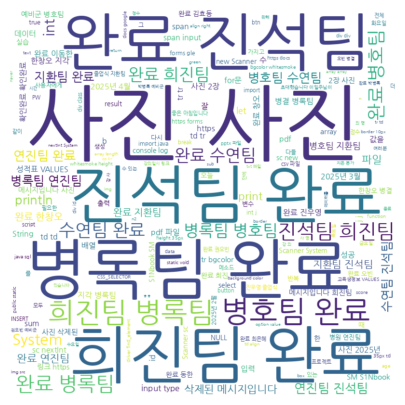

In [126]:
# 워드클라우드 보여주기
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation= 'bilinear') # 워드 클라우드 시각화, bilinear : 픽셀 깨짐 방지(부드럽게)
plt.axis('off') # x,y축 숫자 제거
plt.show()